In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
most_recent

('2017-08-23',)

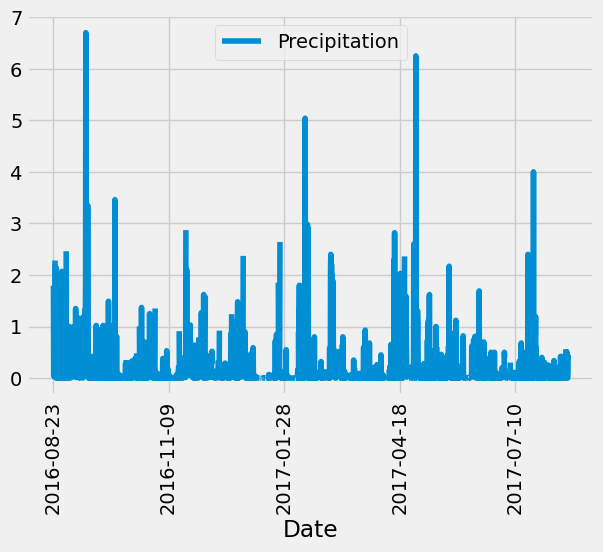

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_word_list = most_recent[0].split("-")
date_list = [int(x) for x in date_word_list]
end_date = dt.date(date_list[0], date_list[1], date_list[2])
# Calculate the date one year from the last date in data set.
start_date = end_date-dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement_table.date, measurement_table.prcp).\
    filter(measurement_table.date >= start_date).\
    filter(measurement_table.date <= end_date)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(data, columns = ["Date", "Precipitation"])
# Sort the dataframe by date
measurement_df=measurement_df.sort_values("Date").reset_index(drop = True)


# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.set_index("Date", inplace=True)
measurement_df.plot()
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [56]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [73]:
# Design a query to calculate the total number of stations in the dataset
data = session.query(measurement_table.station).group_by(measurement_table.station)
df = pd.DataFrame(data, columns = ["station"])
len(df["station"].unique())

9

In [82]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_query = session.query(measurement_table.station, func.count(measurement_table.station)).\
    group_by(measurement_table.station).\
    order_by(func.count(measurement_table.station).desc())
station_list =[]
for row in station_query:
    station_list.append(row)
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_data = session.query(func.min(measurement_table.tobs), func.max(measurement_table.tobs), \
        func.avg(measurement_table.tobs)).\
        group_by(measurement_table.station).\
        filter(measurement_table.station == station_list[0][0]).all()
active_data
        
                            


[(54.0, 85.0, 71.66378066378067)]

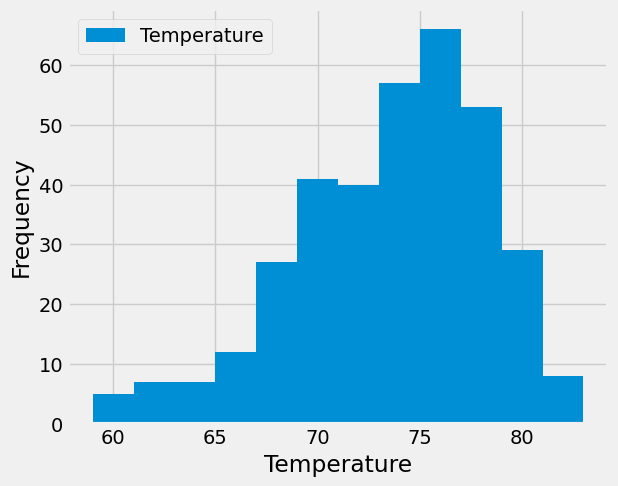

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurement_table.tobs).\
    filter(measurement_table.date >= start_date).\
    filter(measurement_table.date <= end_date).\
    filter(measurement_table.station == station_list[0][0]).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperature_df = pd.DataFrame(temp_data, columns = ["Temperature"])

# # Use Pandas Plotting with Matplotlib to plot the data
temperature_df.plot.hist(bins = 12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()

# Close Session

In [100]:
# Close Session
session.close()